# Reinhard Normalization of the Images

Code is write on basis of Reasearch of
Erik Reinhard, Michael Ashikhmin, Bruce Gooch,
and Peter Shirley from the University of Utah
https://www.cs.tau.ac.il/~turkel/imagepapers/ColorTransfer.pdf

In [ ]:
from PIL import Image
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
# Define the Folder Path of the Images
images_folder =r'C:\Users\simon\OneDrive\Desktop\NOVA Semester\Deep Learing\Project\Data\processedData'
target_folder=r'C:\Users\simon\OneDrive\Desktop\NOVA Semester\Deep Learing\Project\Data\reinhard'
csv_file_path =r"C:\Users\simon\OneDrive\Desktop\NOVA Semester\Deep Learing\Project\Data\dsfoldTable.csv"
refence_image_filename=' SOB_B_A-14-22549AB-100-018.png'

# Converting RGB TO LAB


In [ ]:
from skimage import io ,color
# Convert RGB TO LAB
def transforRGB_to_LAB(image_file:str):
  rgb = io.imread(f"{images_folder}\{image_file}")
  lab = color.rgb2lab(rgb)
  lab_image=np.array(lab)
  return lab_image

# Convert LAB back to RGB
def transform_Lab_to_RGB(lab_image):
  rgb_new=color.lab2rgb(lab_image)
  return rgb_new

In [ ]:
def Lab_Channels_Mean(lab_image):
  #Calulate Channel Means
  L_mean = np.mean(lab_image[:,:,0])
  a_mean = np.mean(lab_image[:,:,1])
  b_mean = np.mean(lab_image[:,:,2])
  return L_mean,a_mean,b_mean

def Lab_Channels_Std(lab_image):
  # Calculate Channel Standard Deviation
  L_std = np.std(lab_image[:,:,0])
  a_std = np.std(lab_image[:,:,1])
  b_std = np.std(lab_image[:,:,2])
  return L_std,a_std,b_std

In [ ]:
def normalize_Image(target_image,mean_ref,std_ref):
  # get Mean of the Channels for Target Image

  L_mean ,a_mean,b_mean = Lab_Channels_Mean(target_image)
  # get Mean of the Channels for refence Image
  L_std,a_std,b_std = Lab_Channels_Std(target_image)
  # Transform to Traget
  normalize_Image =np.zeros_like(target_image)
  # L
  normalize_Image[:,:,0] =((target_image[:,:,0]-L_mean)/L_std)*std_ref[0]+mean_ref[0]
  # a
  normalize_Image[:,:,1] =((target_image[:,:,1]-a_mean)/L_std)*std_ref[1]+mean_ref[1]
  # b
  normalize_Image[:,:,2] =((target_image[:,:,2]-b_mean)/b_std)*std_ref[2]+mean_ref[2]
  return normalize_Image

In [ ]:
# normalize a Picture with the Information of the Refence image Chanels Means and Standart Deviations
def reinhard_normalize_img(target_image_rgb,mean_ref,std_ref):
  # Trasnform to LAB
  target_Lab=transforRGB_to_LAB(target_image_rgb)
  # Change the Mean and Standart Deviation
  normalized_image=normalize_Image(target_Lab,mean_ref,std_ref)
  # Transform back to RGB
  normalized_image_rgb=transform_Lab_to_RGB(normalized_image)
  return normalized_image_rgb

In [ ]:
# Script for running CSV with the Filenames through the function
def unify_colors(csv_file,refence_imagefilename):
    # caclulte the necesary information about the reference Image
    refrence_img_Lab=transforRGB_to_LAB(refence_imagefilename)
    mean_ref,std_ref=Lab_Channels_Mean(refrence_img_Lab),Lab_Channels_Std(refrence_img_Lab)
    # iterate through all the Rows in the Csv with the filenames
    for index, row in csv_file.iterrows():
      filename=row["filename"]
      normalized_image_rgb=reinhard_normalize_img(f" {filename}",mean_ref,std_ref)
      # save the image in the Target Folder
      plt.imsave(f'{target_folder}\{filename}',normalized_image_rgb)

In [ ]:
csv_file= pd.read_csv(csv_file_path)
csv_file

In [ ]:
# Run the Script
unify_colors(csv_file,refence_image_filename)

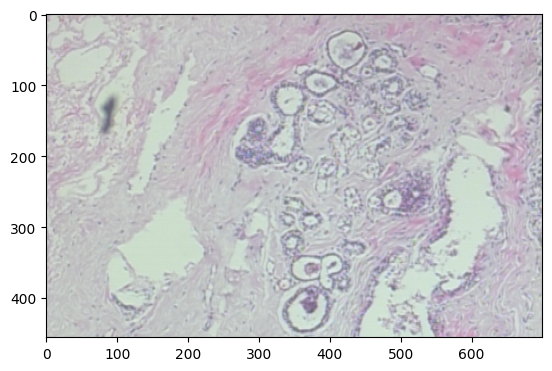

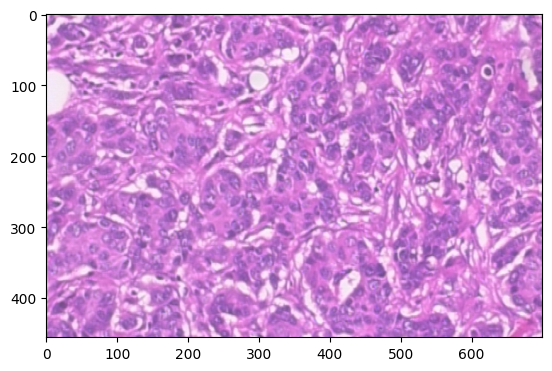

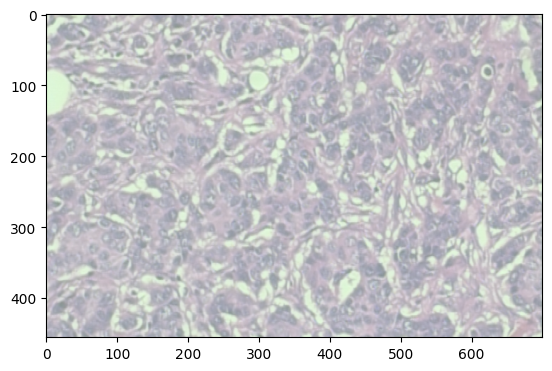

In [208]:
# Test With One Image and Show Results

refrence_image_path=' SOB_B_A-14-22549AB-40-001.png'
target_image_path=' SOB_M_DC-14-5695-100-021.png'


# Open refence Image
refence_image=Image.open(f"{images_folder}\{refrence_image_path}")

# get refrence image Information
refrence_img_Lab=transforRGB_to_LAB(refrence_image_path)
mean_ref,std_ref=Lab_Channels_Mean(refrence_img_Lab),Lab_Channels_Std(refrence_img_Lab)

# normlize target Picture with Refence Image Information
normalized_image_rgb=reinhard_normalize_img(target_image_path,mean_ref,std_ref)

# Show results

# Show Refrence Image
target_image=Image.open(f"{images_folder}\{target_image_path}")
plt.imshow(refence_image)
plt.show()
# Show Target Image Before
plt.imshow(target_image)
plt.show()

# Show Target Image After
plt.imshow(normalized_image_rgb)
plt.show()